# <center> Traffic Sign Detection</center>

Traffic signs are important as they help the drivers to follow traffic rules and reduce the number of accidents on road. However, it is often very difficult for a driver to focus on the signs along with the other happenings on the road. In addition to this, traffic sign detection is also very important for the fast growing technology of automated driving and driverless cars.

<center><div>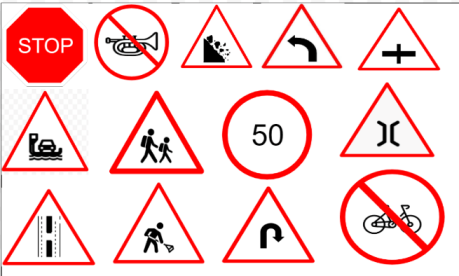</div></center>

In this notebook we use the [German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) Dataset which has lifelike images of traffic signs which a=have been classified into 43 classes. The train and test sets combined consist of more than 50000 images. We use a Convolutional Neural Network(CNN) for this purpose and achieve a **test set accuracy of more than 99%**.

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

Reading the Data

In [3]:
def showImg(img):
    plt.figure(figsize =(5,5))
    plt.imshow(img,cmap='gray')
    plt.show()

In [4]:
imgs_path = "../input/gtsrb-german-traffic-sign/Train"
data_list = []
labels_list = []
classes_list = 43
length_class_list = []
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    countClassList = 0
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
        countClassList += 1
    print(f"Class {i} have {countClassList} images")
    length_class_list .append(countClassList)
    
data = np.array(data_list)
labels = np.array(labels_list)

In [5]:
print(f"Dataset have {sum(length_class_list)} images")

In [6]:
labels

In [7]:
len(labels)

In [4]:
plt.figure(figsize=(12,6))
plt.bar(range(0,classes_list),length_class_list)
plt.title('Distribution of Dataset')
plt.xlabel('Number of class')
plt.ylabel('Number of images')
plt.show()

In [5]:
print(min(length_class_list))
print(max(length_class_list))


In [6]:
print(len(data))
print(len(labels))

In [7]:
print(type(data[0]))

In [5]:
# Importing necessary functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
   
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
    
# Loading a sample image 
img = load_img('../input/imgtest/test.jpg') 
# Converting the input sample image to an array
x = img_to_array(img)
# Reshaping the input image
x = x.reshape((1, ) + x.shape) 
   
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
i = 0
for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='preview', 
                          save_prefix ='image', save_format ='jpeg'):
    i += 1
    if i > 5:
        break

Data Visualization

In [8]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [9]:
showImg(data[0])

In [10]:
len(data[0])

The data seems pretty realistic which is a very good sign

Preparing the Dataset

In [11]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [12]:
showImg(X[0].astype('int32'))

Splitting the dataset

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

**CNN Model**

In [14]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

model.summary()

Fitting the model

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=100,
                 batch_size=64,
                 validation_data=(X_val,Y_val))

Visualisation of accuracy and loss

In [16]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

Prediction and Evaluation

In [17]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

# Thank You

In [18]:
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [19]:
len(Y_pred)

In [20]:
showImg(X_test[0].astype('int32'))
print(getCalssName(Y_pred[0]))

In [21]:
img = Image.open('../input/imgtest/test.jpg')
img = img.resize((32,32))
img = np.array(img)
# showImg(img)
# img = np.array(img)
img = img.astype('float32')
img = img.reshape(1,32,32,3)

In [22]:
Y_pred = model.predict(img)
Y_pred = np.argmax(Y_pred, axis=1)
print(getCalssName(Y_pred))